In [1]:
# Asong Samuel_Case Study_Group 08_Week 07_Cohort 07_2024_04_20

# Case Study - Titanic


## Table of Contents


[**Step 1: Business Understanding**](#Step-1:-Business-Understanding)

[**Step 2: Data Understanding**](#Step-2:-Data-Understanding)

- [**Load Data**](#Load-Data)
- [**Check Data Quality**](#Check-Data-Quality)
- [**Exploratory Data Analysis-EDA**](#Exploratory-Data-Analysis---EDA)
 

[Back to Top](#Table-of-Contents)

## Step 1: Business Understanding
This initial phase focuses on understanding the project objectives and requirements from a business perspective, and then converting this knowledge into a data mining problem definition, and a preliminary plan designed to achieve the objectives.
#### Titanic Story
The sinking of the RMS Titanic is one of the most infamous shipwrecks in history.  On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. This sensational tragedy shocked the international community and led to better safety regulations for ships.

One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew. Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class passengers.

#### Objective
In this challenge, we will complete the analysis of what sorts of people were likely to survive. 

In addition, we will build a regression model to predict ticket price(Fare).



[Back to Top](#Table-of-Contents)

## Step 2: Data Understanding
The data understanding phase starts with an initial data collection and proceeds with activities in order to get familiar with the data, to identify data quality problems, to discover first insights into the data, or to detect interesting subsets to form hypotheses for hidden information. This step is often mixed with the next step, Data Preparation.

### Data Dictionary
The data is in a csv file titanic.csv. 

| Variable | Definition | Key |
| --- | --- | --- |
| survival | Survival | 0 = No, 1 = Yes |
| pclass | Ticket class	| 1 = 1st, 2 = 2nd, 3 = 3rd |
| sex | Sex | male/femail |	
| Age | Age | in years |
| sibsp | # of siblings / spouses aboard the Titanic | |
| parch | # of parents / children aboard the Titanic | |
| ticket | Ticket number | |
| fare | Passenger fare | |
| cabin | Cabin number | |
| embarked | Port of Embarkation | C = Cherbourg, Q = Queenstown, S = Southampton |

**Variable Notes**
- pclass: A proxy for socio-economic status (SES)
 - 1st = Upper
 - 2nd = Middle
 - 3rd = Lower

- age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

- sibsp: The dataset defines family relations in this way...
- Sibling = brother, sister, stepbrother, stepsister
- Spouse = husband, wife (mistresses and fiancés were ignored)

- parch: The dataset defines family relations in this way...
 - Parent = mother, father
 - Child = daughter, son, stepdaughter, stepson
 - Some children travelled only with a nanny, therefore parch=0 for them.



### Load Data

This dataset is in titanic.csv. Make sure the file is in current folder. Please download the file from [here](https://github.com/data-lessons/python-business/tree/gh-pages/data) if you haven't done so yet.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

In [3]:
#  This code reads the csv file into a DataFrame named df, ready for further data analysis or manipulation.
#  Import the titanic data

df_titanic = pd.read_csv("C:\\Users\\pc\\Desktop\\PYTHON\\Python_Week 7\\Week-7_Case Study\\titanic.csv")

df_titanic = pd.DataFrame(df_titanic)

df_titanic.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,$7.25,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,$71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,$7.925,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,$53.1,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,$8.05,NaN,S


In [4]:
df_titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

### Check Data Quality
Check data quality. Most common check is to check missing values. We can do some basic data cleaning like cleaning up currency field.
- Check null values
- Currency field need to be converted to float, remove '$' or ',', sometimes negative value is enclosed in ()


##### Task1: Check out Basic Dataframe Info

Hint: info() function.

Discuss missing values in the dataframe.

In [5]:
# Verifyinhg the Null value
df_titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    object 
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(1), int64(5), object(6)
memory usage: 83.7+ KB


In [7]:
# Fill in the missing Data with 0
titanic = df_titanic.fillna(0)
titanic.isna().any().sum()

0

In [8]:
# checking for missing data 
missing_data = titanic.isna().sum()
missing_data

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

##### Task2: Clean up Fare, Convert to Float
Strip "$" from Fare, convert datatype to float.

In [42]:
df_titanic = pd.DataFrame(df_titanic)
def clean_Fare(df_titanic):
            # Clean up 'Fare' column: strip "$" and convert to float 
                 
                    df_titanic['Fare'] = df_titanic['Fare'].str.replace('$', ' ').astype(float)

   
                    return df_titanic

df_titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


##### Task3: Check out statistics of Numeric Columns

Hint:describe() function.

Discuss:
- Age, SibSp, Parch, Fare statistics
- What does mean Survived mean?

In [43]:
# Describe statistics of titanic
titanic_statistics = df_titanic[['Age', 'SibSp', 'Parch', 'Fare', 'Survived']].describe().T
titanic_statistics

,count,mean,std,min,25%,50%,75%,max
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000


In [ ]:
# The dataset statistics provide a snapshot of various aspects:

# Age: The average age is around 29.7 years, with a spread from 0.42 to 80 years. 
#     Most passengers are under 38 years old.
# Siblings/Spouses (SibSp): On average, passengers have around 0.52 siblings or spouses, 
#     ranging up to 8. Some travel alone (0), while others have larger families.
# Parents/Children (Parch): The average number of parents or children aboard is about 0.38, 
#     with a range from 0 to 6. Many passengers traveled without parents or children.
# Fare: The mean fare is approximately 32.20 units, with a wide range from 0 to 512.33 units.
#     Some fares might represent anomalies or free tickets.
# Survived: Around 38% of passengers survived, as indicated by the mean of the 'Survived' column.
#    These statistics paint a picture of the passengers' demographics, family compositions,
#    financial backgrounds, and survival rates aboard the Titanic.

### Exploratory Data Analysis - EDA
EDA is an approach to analyzing data sets to summarize their main characteristics, often with visual methods.

#### Types Of Features
##### Categorical Features:
A categorical variable is one that has two or more categories and each value in that feature can be categorised by them.For example, gender is a categorical variable having two categories (male and female). Now we cannot sort or give any ordering to such variables. They are also known as Nominal Variables.

Categorical Features in the dataset: Sex,Embarked.

##### Continous Feature:
A feature is said to be continous if it can take values between any two points or between the minimum or maximum values in the features column.

Continous Features in the dataset: Fare

### Categorical Features
We will analysis Survived as univariant. Relationship between Sex and Survival, Embarked and Survivval.

#### How many survived
Bar chart on Survived column. There are multiple ways to do the bar chart. We will demonstrate 2 ways here, seaborn countplot and pandas series bar.

##### Task4: Plot bar chart for Perished vs. Survived
Plot bar chart for Survived column. Survived=0 means perished, Survived=1 means Survived.

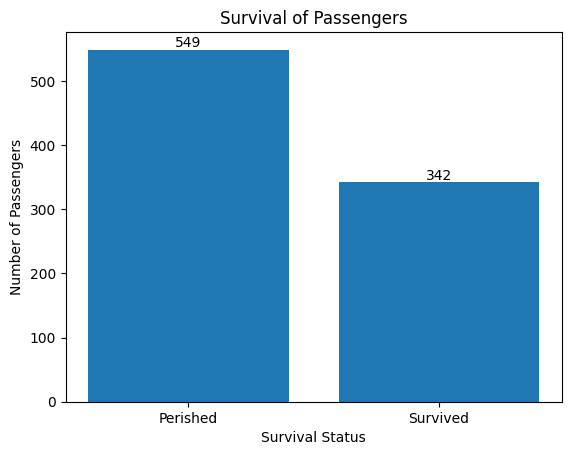

In [44]:
# show Survived=0 means perished, Survived=1 means Survived in the Survived column
survival_counts = df_titanic['Survived'].value_counts()

# Plot bar chart
labels = ['Perished', 'Survived']

# Show figures on the bar plot
for index, value in enumerate(survival_counts):
    plt.text(index, value, str(value), ha='center', va='bottom')


plt.bar(['Perished', 'Survived'], survival_counts)
plt.xlabel('Survival Status')
plt.ylabel('Number of Passengers',)
plt.title('Survival of Passengers')

plt.show(labels, survival_counts)




#### Relationship between Sex and Survival
We may use aggregation function or plot.

Next 2 cells demonstate aggregate function.

The following cell demonstrates bar plot and countplot.


##### Task5: Plot Bar Chart on Number of Male and Femal Passengers

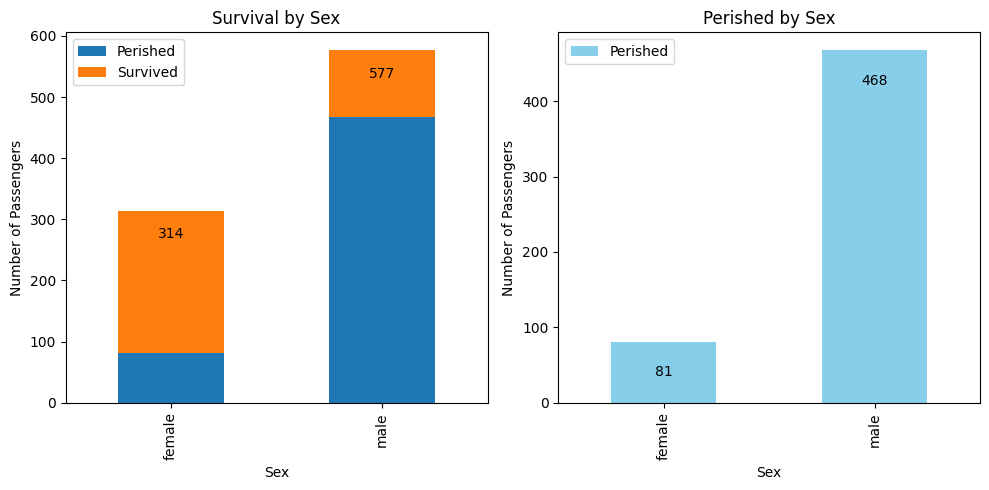

In [89]:

# Group the data by 'Sex' and 'Survived', and count the occurrences of each group
survival_by_sex = df_titanic.groupby(['Sex', 'Survived']).size().unstack(fill_value=0)

# Calculate perished counts by sex
perished_by_sex = df_titanic[titanic['Survived'] == 0].groupby('Sex').size()

# Plot both survival and perished counts by sex in stacked bar charts
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
survival_by_sex.plot(kind='bar', stacked=True, ax=ax1)
perished_by_sex.plot(kind='bar', stacked=True, ax=ax2, color='skyblue')

# Show the number of passengers on each bar for survival
for i in range(len(survival_by_sex)):
    ax1.text(i, survival_by_sex.iloc[i].sum() - 50, str(survival_by_sex.iloc[i].sum()), ha='center', va='bottom')

# Show the number of passengers on each bar for perished
for i in range(len(perished_by_sex)):
    ax2.text(i, perished_by_sex.iloc[i] - 50, str(perished_by_sex.iloc[i]), ha='center', va='bottom')

ax1.set_xlabel('Sex')
ax1.set_ylabel('Number of Passengers')
ax1.set_title('Survival by Sex')
ax1.legend(['Perished', 'Survived'], loc='upper left')

ax2.set_xlabel('Sex')
ax2.set_ylabel('Number of Passengers')
ax2.set_title('Perished by Sex')
ax2.legend(['Perished'], loc='upper left')

plt.tight_layout()
plt.show()



# The Total number of Female who Survived was 314 -81 = 233 women.
# The Total Number of MAle who Survived was 577 - 468 = 109 men.
# The adds up to the 342 Total passengers who survived.

##### Task6: Groupby Sex to Find Survival Rate of Male and Female

In [46]:
# Group the data by 'Sex' then calculate the mean of the 'Survived' column
survival_rate_by_gender = df_titanic.groupby('Sex')['Survived'].mean() * 100
# Format the percentages to two decimal places
survival_rate_by_gender_formatted = survival_rate_by_gender.map("{:.2f}%".format)

# Calculate the percentage of passengers who perished by gender
perished_rate_by_gender = 100 - survival_rate_by_gender
perished_rate_by_gender_formatted = perished_rate_by_gender.map("{:.2f}%".format)

# Print the survival and perished rates by gender
print("Survival Rate by Gender:")
print(survival_rate_by_gender_formatted)
print("\nPerished Rate by Gender:")
print(perished_rate_by_gender_formatted)


Survival Rate by Gender:
Sex
female    74.20%
male      18.89%
Name: Survived, dtype: object

Perished Rate by Gender:
Sex
female    25.80%
male      81.11%
Name: Survived, dtype: object


##### Task7: Plot Perished vs. Survived Bar for Male and Femail
We will use seaborn countplot() again, but set argument `hue` to 'Survived'.

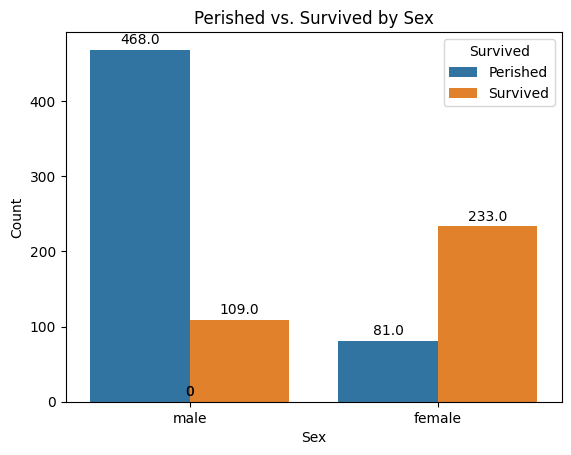

In [47]:

# Create the countplot
ax = sns.countplot(data= df_titanic, x='Sex', hue='Survived')

# Add counts on each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom',
                fontsize=10, color='black', xytext=(0,2), textcoords='offset points')

# Set labels and title
plt.xlabel('Sex')
plt.ylabel('Count')
plt.title('Perished vs. Survived by Sex')
plt.legend(title='Survived', labels=['Perished', 'Survived'])

# Show the plot
plt.show()


#  Number of men on the ship is lot more than the number of women. 
#  Still the number of survived women is almost twice the number of survived males.
#  Majority women survived while vast majority of men perished.

#### Pclass and Survival
##### Task 8: List survival rate of each Pclass 

In [48]:
# Group the data by 'Pclass' then calculate the mean of the 'Survived' column
survival_rate_by_pclass = df_titanic.groupby('Pclass')['Survived'].mean() * 100

# Format the percentages to two decimal places
survival_rate_by_pclass_formatted = survival_rate_by_pclass.map("{:.2f}%".format)

# Print the survival rates by passenger class in percentage format
print("Survival Rate by Passenger Class:")
print(survival_rate_by_pclass_formatted)


Survival Rate by Passenger Class:
Pclass
1    62.96%
2    47.28%
3    24.24%
Name: Survived, dtype: object


##### Task 9: Plot Perished vs. Survived for each Pclass

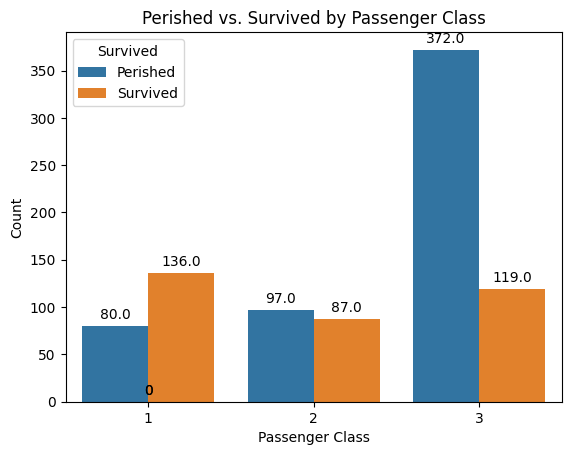

In [49]:

# Create the countplot
ax = sns.countplot(data=df_titanic, x='Pclass', hue='Survived')

# Add count figures on each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom', fontsize=10, color='black', 
                xytext=(0, 3), textcoords='offset points')

# Set labels and title
plt.xlabel('Passenger Class')
plt.ylabel('Count')
plt.title('Perished vs. Survived by Passenger Class')
plt.legend(title='Survived', labels=['Perished', 'Survived'])

# Show the plot
plt.show()


### Continuous Features


#### Univariate Distribution Plot
There are multiple ways to do histogram. I will demonstrate 3 ways.
- ax.hist(): can not handle NnN value
- seaborn.distplot(): can not handle NaN. Has KDE(kernel density estimation) by default.
- pd.Sereis.hist(): simplest and can handle NaN by default

##### Task 10: Plot histogram for Age
Use pandas Series hist() function which handles missing value.

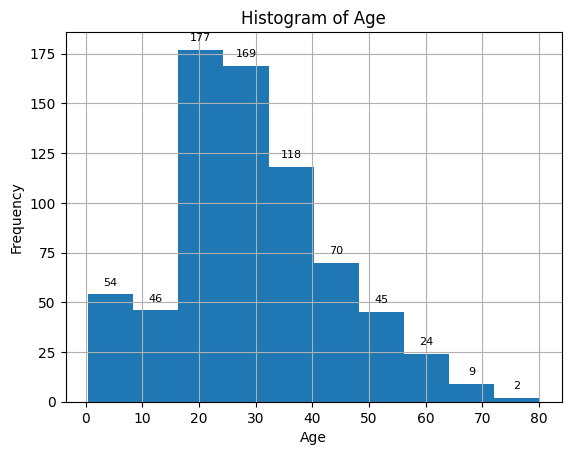

In [50]:

# Create the histogram
ax = df_titanic['Age'].hist()

# Add frequency numbers on each bar
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom', fontsize=8, color='black', 
                xytext=(0, 5), textcoords='offset points')

# Set labels and title
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Histogram of Age')

# Show the plot
plt.show()


# Majority of the passengers who survived were between 15 and 40 years old,
# 16 to 28 years were the most who survived.

##### Task11: Stack age histogram of survived on top of overall age histogram
Plot histogram for Age, then filter out survived passenger and plot histogram for Age on same axis. Set different color and label.

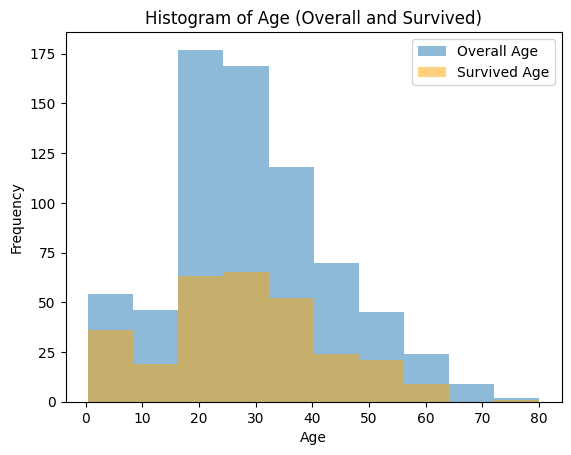

In [57]:
# Plot overall age histogram
plt.hist(df_titanic['Age'].dropna(), bins=10, alpha=0.5, label='Overall Age')

# Filter survived passengers and plot their age histogram
survived_age = df_titanic[titanic['Survived'] == 1]['Age'].dropna()
plt.hist(survived_age, bins=10, alpha=0.5, color='orange', label='Survived Age')


plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Histogram of Age (Overall and Survived)')
plt.legend()
plt.show()

# The youths 16 to 25 years survived most and also16 to 25 years was the age group that perished most.

[Back to Top](#Table-of-Contents)
